In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [42]:
# from google.colab import drive
# drive.mount('/content/drive')
# nRowsRead = None
# cattle_dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/synthetic cattle_dataset.csv', delimiter=',', nrows = nRowsRead)


In [43]:
# nRowsRead = None
# cattle_dataset = pd.read_csv('/content/cattle_dataset.csv', delimiter=',', nrows = nRowsRead)

In [10]:
cattle_dataset = pd.read_csv('cattle_dataset.csv')


In [11]:
cattle_dataset.head()

,body_temperature,breed_type,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,faecal_consistency,health_status
0,40.3,Cross Breed,10.1,19.0,5004.0,7.2,5.0,44.0,1.8,16.4,3.2,3.0,Fresh blood in faeces,unhealthy
1,38.6,Cross Breed,14.3,26.0,11678.0,3.7,2.0,57.0,2.3,14.0,4.5,2.0,Fresh blood in faeces,unhealthy
2,39.4,Cross Breed,13.2,14.0,5282.0,6.4,2.0,52.0,1.8,16.4,3.2,3.0,ideal,unhealthy
3,39.7,Cross Breed,12.1,31.0,5236.0,6.8,3.0,53.0,1.4,16.3,5.3,3.0,extremely firm,unhealthy
4,40.2,Cross Breed,6.7,23.0,5004.0,7.2,5.0,49.0,1.9,15.4,3.4,3.0,very liquid faeces,unhealthy


In [12]:
cattle_dataset = cattle_dataset.drop('faecal_consistency', axis=1)
cattle_dataset.dropna(inplace=True)

cattle_dataset.isnull().sum()


body_temperature        0
breed_type              0
milk_production         0
respiratory_rate        0
walking_capacity        0
sleeping_duration       0
body_condition_score    0
heart_rate              0
eating_duration         0
lying_down_duration     0
ruminating              0
rumen_fill              0
health_status           0
dtype: int64

In [7]:
# for column in cattle_dataset.columns:
#     plt.hist(cattle_dataset[column])
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.title(f'Histogram of {column}')
#     plt.show()

#### correlation matrix

In [13]:

# Calculate the correlation matrix
correlation = cattle_dataset.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



ValueError: could not convert string to float: 'Cross Breed'

In [14]:
X = cattle_dataset.drop('health_status', axis=1)
y = cattle_dataset['health_status']


In [15]:
print("Total number of rows:", cattle_dataset.shape[0])



Total number of rows: 5000


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_test.head()

,body_temperature,breed_type,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill
1501,38.4,Normal Breed,8.5,46.0,10773.0,3.7,5.0,68.0,2.0,14.4,5.1,3.0
2586,39.9,Cross Breed,5.1,24.0,5004.0,7.2,3.0,50.0,1.3,16.4,3.1,1.0
2653,40.3,Normal Breed,5.1,15.0,5004.0,7.2,2.0,48.0,1.3,16.4,3.2,3.0
1055,39.5,Normal Breed,14.7,14.0,5004.0,6.5,2.0,49.0,1.3,15.9,4.5,2.0
705,39.9,Normal Breed,9.7,20.0,5004.0,6.6,2.0,55.0,1.3,16.4,4.7,2.0


In [18]:
y_train = y_train.replace({'healthy': 1, 'unhealthy': 0})
y_test = y_test.replace({'healthy': 1, 'unhealthy': 0})

In [19]:
print("Training set shape:", y_train.shape)
print("Testing set shape:", y_test.shape)


Training set shape: (4000,)
Testing set shape: (1000,)


In [20]:
X_train = X_train.drop('breed_type', axis=1)
X_test = X_test.drop('breed_type', axis=1)

### linear regression

In [21]:
from sklearn.linear_model import LinearRegression


# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the performance score (R-squared)
linr_score = r2_score(y_test, y_pred)

# Print the performance score
print("Performance score:", linr_score)


Performance score: 0.5635398692117914


### logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression


# Create a logistic regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the performance score (accuracy)
logr_score = accuracy_score(y_test, y_pred)

# Print the performance score
print("Performance score:", logr_score)


Performance score: 0.852


D:\ML\timer\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Classifer

In [23]:
from sklearn.tree import DecisionTreeClassifier


# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate the performance score (accuracy)
dtc_score = accuracy_score(y_test, y_pred)

# Print the performance score
print("Performance score:", dtc_score)


Performance score: 0.787


### Random Forest classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest classifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the performance score (accuracy)
rf_score = accuracy_score(y_test, y_pred)

# Print the performance score
print("Performance score:", rf_score)


Performance score: 0.844


In [25]:
X_test.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill
1501,38.4,8.5,46.0,10773.0,3.7,5.0,68.0,2.0,14.4,5.1,3.0
2586,39.9,5.1,24.0,5004.0,7.2,3.0,50.0,1.3,16.4,3.1,1.0
2653,40.3,5.1,15.0,5004.0,7.2,2.0,48.0,1.3,16.4,3.2,3.0
1055,39.5,14.7,14.0,5004.0,6.5,2.0,49.0,1.3,15.9,4.5,2.0
705,39.9,9.7,20.0,5004.0,6.6,2.0,55.0,1.3,16.4,4.7,2.0


### SVM

In [26]:
from sklearn.svm import SVC


# Create an SVM classifier
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the performance score (accuracy)
svm_score = accuracy_score(y_test, y_pred)

# Print the performance score
print("Performance score:", svm_score)


Performance score: 0.834


### KNeighborsClassifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier


# Create a KNN classifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the performance score (accuracy)
knn_score = accuracy_score(y_test, y_pred)

# Print the performance score
print("Performance score:", knn_score)


Performance score: 0.822


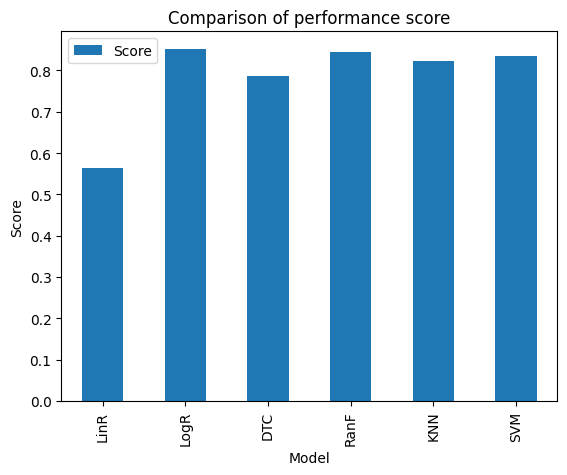

In [28]:
import matplotlib.pyplot as plt


scores = pd.DataFrame({'Model': ['LinR', 'LogR', 'DTC', 'RanF', 'KNN', 'SVM'], 'Score': [ linr_score, logr_score, dtc_score, rf_score,knn_score, svm_score]})

# Plot the bar graph
scores.plot(x='Model', y='Score', kind='bar')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of performance score')
plt.show()

### Predict with the given values

In [29]:

new_data = np.array([[38.5, 20.2, 16.0, 5004.0, 4.6, 5.0, 55.0, 2.5, 12.5, 4.4, 2.0]])

prediction = dt.predict(new_data)
# note: predicted value should be healthy

result = 'healthy' if prediction[0] == 1 else 'unhealthy'
print("Predicted value:", result)


Predicted value: healthy


D:\ML\timer\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## note: Select up or down cell and delete other

Saving the trained model

In [34]:
import pickle


In [35]:
with open('random_forest_model.sav', 'wb') as file:
    pickle.dump(rf, file)

In [36]:
# loading the saved model
loaded_model = pickle.load(open('random_forest_model.sav', 'rb'))

In [37]:

input_data = (38.5, 20.2, 16.0, 5004.0, 4.6, 5.0, 55.0, 2.5, 12.5, 4.4, 2.0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Cow has some abnormality')
else:
  print('The Cow is Healthy')

[1]
The Cow is Healthy


D:\ML\timer\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
